In [77]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

In [78]:
df=pd.read_csv('prof.csv')

# Create readable time values.
df["Elapsed_s"]=pd.to_timedelta(df['Elapsed']).astype('timedelta64[s]').astype(int)
df["CPUTime_s"]=pd.to_timedelta(df['CPUTime']).astype('timedelta64[s]').astype(int)
df["MaxRSS"]=df.apply(lambda row: int(row["MaxRSS"][:-1])*1000, axis=1)

#df["MaxRSS="]
#JobId,AllocCPUS,NTasks,AllocNodes,CPUTime,Elapsed,MaxRSS,Hyperthreading

# Aggrigate
df_agg=df.groupby(["AllocCPUS","Hyperthreading"], as_index=False).agg({'Elapsed_s': ['mean', 'std'],'CPUTime_s': ['mean', 'std'],'MaxRSS': ['mean', 'std']})
df_agg.columns = ["AllocCPUS","Hyperthreading",'Elapsed_s', 'Elapsed_s_std','CPUTime_s', 'CPUTime_s_std','MaxRSS', 'MaxRSS_std']
df_agg.reindex()
#print(df_agg)

,AllocCPUS,Hyperthreading,Elapsed_s,Elapsed_s_std,CPUTime_s,CPUTime_s_std,MaxRSS,MaxRSS_std
0,4,True,2349,NaN,9396,NaN,4141012000,NaN
1,6,True,1740,NaN,10440,NaN,3939508000,NaN
2,8,True,1256,NaN,10048,NaN,3849668000,NaN
3,10,True,1072,NaN,10720,NaN,4016636000,NaN
4,12,True,1012,NaN,12144,NaN,4055408000,NaN
5,14,True,933,NaN,13062,NaN,4068936000,NaN
6,16,True,991,NaN,15856,NaN,4091396000,NaN
7,18,True,744,NaN,13392,NaN,4145580000,NaN
8,20,True,739,NaN,14780,NaN,4180512000,NaN
9,22,True,649,NaN,14278,NaN,4242864000,NaN


In [79]:
#Speedup reference time.
ref_time=4406

df_agg["Speedup"]=df_agg.apply(lambda row: ref_time/row["Elapsed_s"], axis=1)
df_agg["CpuEfficiency"]=df_agg.apply(lambda row: ref_time/(row["Elapsed_s"]*row["AllocCPUS"]),axis=1)

In [82]:
fig = px.line(df_agg, x="AllocCPUS", y="Speedup", color="Hyperthreading", error_y="Elapsed_s_std", hover_data={"Speedup":False,"Hyperthreading":False,"AllocCPUS":False,"Elapsed_s":True,"CpuEfficiency":":.0%","MaxRSS":":.2s%"})

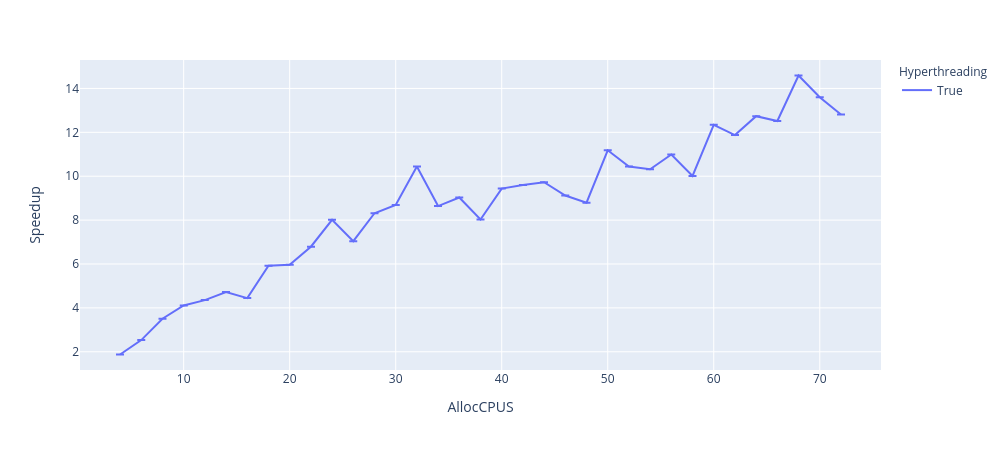

In [83]:
fig.show()

In [ ]:
# fig.update_layout(
#     updatemenus=[
#         dict(
#             buttons=list([
#                 dict(
#                     args=[{'y': "MaxRSS"}],
#                     label="Memory",
#                     method="update"
#                 ),
#                 dict(
#                     args=[{'y': "speedup"}],
#                     label="Speedup",
#                     method="update"
#                 )
#             ]),
#         ),
#     ]
# )